In [0]:


Dr Chaitanya Joshi
Data Science Campus


A very rough testing the principles outlined in 

The Assessment of twitter’s potential for outbreak Detection: Avian Influenza Case Study
#https://www.nature.com/articles/s41598-019-54388-4


on covid-19 Twitter dataset available from

#https://www.kaggle.com/smid80/coronavirus-covid19-tweets
#https://www.kaggle.com/gayatris/coronatweetanalysisandsummarization/data


In [0]:


from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/twitter_data

!ls

In [0]:

!pip install statsmodels==v0.11.1
!pip install sesd
!pip install rpy2
!pip install rstl



In [3]:
import pandas as pd
import zipfile
import nltk
nltk.download('punkt')
from bs4 import BeautifulSoup
import re
import glob


import datetime

import matplotlib.pyplot as plt


import pyculiarity.detect_ts as detect_ts


import statsmodels
statsmodels.__version__
import sesd


list_files=glob.glob('./*.zip')

plt.rcParams['figure.figsize'] = [10, 5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
list_files=['./Coronavirus_Tweets_9_10_11_March.csv.zip',
 './Coronavirus_Tweets_16_March.csv.zip',
 './Coronavirus_Tweets_18_March.csv.zip',
 './Coronavirus_Tweets_17_March.csv.zip',
 './Coronavirus_Tweets_12_March.csv.zip',
 './Coronavirus_Tweets_14_March.csv.zip',
 './Coronavirus_Tweets_15_March.csv.zip',
 './Coronavirus_Tweets_13_March.csv.zip',
'./Coronavirus_Tweets_19_March.csv.zip',
 './Coronavirus_Tweets_20_March.csv.zip']

In [0]:
twitter_df_raw = [pd.read_csv(x, compression='zip', header=0, sep=',', quotechar='"') for x in list_files]

In [0]:
## First focus on tweets in English

twitter_df_raw =[twitter_df_raw[x][twitter_df_raw[x]['lang']=='en'].reset_index(drop=True) for x in range(len(twitter_df_raw ))]

In [0]:
## First focus on tweets with specified country code

twitter_df_raw =[twitter_df_raw[x][~twitter_df_raw[x]['country_code'].isnull()].reset_index(drop=True) for x in range(len(twitter_df_raw))]

In [0]:


twitter_df_raw=pd.concat(twitter_df_raw)


twitter_df_raw['created_at']=pd.to_datetime(twitter_df_raw['created_at']) 

twitter_df_raw=twitter_df_raw.sort_values(by='created_at',ascending=True)



In [12]:






twitter_df_raw.tail(5)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
22258,1241152449844588544,15649662,2020-03-20 23:59:38+00:00,Listersmate,#Covid_19\n#coronavirus #Internet #InternetOfT...,Twitter for Android,NaN,NaN,NaN,False,False,31130,0,US,"Galax, VA",city,9717,10563,NaN,2008-07-29T18:55:31Z,False,en
22259,1241152485533855744,783185609326288896,2020-03-20 23:59:46+00:00,Driver4hire1,@carriesymonds So FLU kills on average 47 dail...,Twitter for Android,NaN,7.497467e+17,carriesymonds,False,False,685,0,GB,"Warwick, England",city,163,1514,NaN,2016-10-04T06:02:54Z,False,en
22260,1241152514201960451,24706050,2020-03-20 23:59:53+00:00,DBradWhitt,ICYMI - Check out this simple article I wrote ...,Twitter for iPhone,NaN,NaN,NaN,True,False,14574,1,US,"Georgia, USA",admin,4039,2591,NaN,2009-03-16T15:18:41Z,False,en
22261,1241152530165288960,415599621,2020-03-20 23:59:57+00:00,MVP_Pediatric,Which TV doctor would cure #COVID19 first? I ...,Twitter for iPhone,NaN,NaN,NaN,False,False,6254,1,US,MVP Pediatric & Urgent Care,poi,1543,1613,NaN,2011-11-18T15:11:34Z,False,en
22262,1241152532497522693,19658676,2020-03-20 23:59:57+00:00,BigBodyCisco,Now wait a WHOLE GOT DAMN MINUTE!!😩😳🤦🏽‍♂️🤣🙌🏽WH...,Instagram,NaN,NaN,NaN,False,False,675,0,US,"Millbrae, CA",city,4109,1049,NaN,2009-01-28T16:03:05Z,False,en


In [0]:
# Not all tweets will be relevant for the spread of the infection. 
# Hand labelling of some tweets as 'relevant/irrelevant' will be useful. 
# A classifier can be trained in a semi supervised fashion....still needs to be done 

In [0]:
##https://github.com/ikc15/twitter_nlp_ONS/tree/master/Cleaner

def clean_tweet(tweet):
  """
  Input: tweet (original)
  output: tweet without RT tag, username and urls, punctuation """
  # remove url
  clean_tweet = re.sub(r"http\S+", "", tweet)
  # remove @username
  clean_tweet = re.sub(r"@\S+", "", clean_tweet)
  # remove RT
  clean_tweet = re.sub(r"RT", "", clean_tweet)
  # remove #hastags
  #clean_tweet = re.sub(r"#\S+", "", clean_tweet)
  clean_tweet = re.sub(r'([#])|([^a-zA-Z])',' ',clean_tweet)
  # remove punctuation
  tokens = [word.lower() for sent in nltk.sent_tokenize(clean_tweet) for word in nltk.word_tokenize(sent)]
  filtered_tokens = []
  # filter out any tokens not containing letters (e.g., numeric tokens,
  # raw punctuation)
  for token in tokens:
    if re.search('[a-zA-Z]', token):
      filtered_tokens.append(token)
    clean_tweet = ' '.join(filtered_tokens)
  return clean_tweet.lower()

In [0]:
twitter_df_raw['text']=twitter_df_raw['text'].apply(lambda x: clean_tweet(x))

In [0]:
#twitter_df_raw.to_pickle('/content/drive/My Drive/twitter_data/twitter_data_cleaner_text.pkl')

twitter_df_cleaner=pd.read_pickle('/content/drive/My Drive/twitter_data/twitter_data_cleaner_text.pkl')

In [16]:
dict_countries={'US':'United States','GB':'Great Britain','IN':'India','CA':'Canada','IE':'Ireland','AU':'Australia'}

twitter_df_cleaner['country_code'].value_counts()[:25]

US    106272
GB     28309
CA     12201
IN     10793
IE      5325
AU      4603
ZA      3339
NG      2865
PH      2039
PK      2030
KE      1995
IT      1475
DE      1392
ES      1146
MY      1013
NL       960
LK       944
GH       932
AE       873
BE       862
FR       853
UG       674
NZ       647
CH       599
CN       539
Name: country_code, dtype: int64

To prepare the required data, a continuous time-series of the daily number of tweets was calculated for each country 

Text(0, 0.5, 'Total number of corona related tweets')

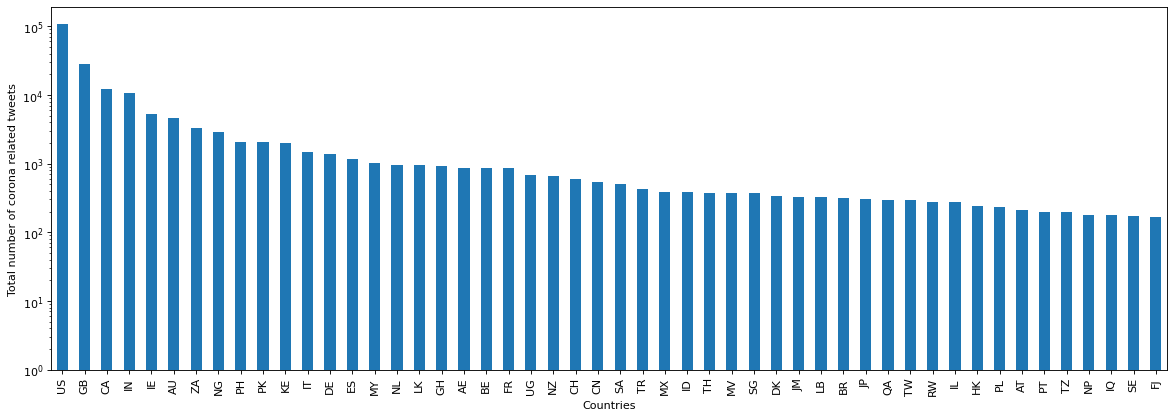

In [17]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
#Finding the total number of tweets from each country within this period

ax = twitter_df_cleaner['country_code'].value_counts()[:50].plot(kind="bar",log=True)
plt.xlabel('Countries')
plt.ylabel('Total number of corona related tweets')
#ax.set_xticklabels([t if not i%5 else "" for i,t in enumerate(ax.get_xticklabels())])

SH-ESD (Seasonal Hybrid Extreme Studentized Deviate) :


The primary algorithm, Seasonal Hybrid ESD (S-H-ESD), builds upon the Generalized ESD test for detecting anomalies. S-H-ESD can be used to detect both global and local anomalies.

This two step process allows SH-ESD to detect both global anomalies that extend beyond the expected seasonal minimum and maximum and local anomalies that would otherwise be masked by the seasonality.

Python implementation of the Twitter Anomaly detection package (in R) can be found here 

https://github.com/zrnsm/pyculiarity

There are other implementations of the techniques available too
e.g.

https://github.com/callmeashish/Anomaly-Detection-SH-ESD


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
def detect_anmly_and_show(df,cntry_name):
  df=df[df['country_code']==cntry_name]
  df['Dates'] = df['created_at'].dt.date
  df['Hour'] = df['created_at'].dt.hour

  df=df[(df['text'].str.contains('flu'))|(df['text'].str.contains('virus'))|(df['text'].str.contains('corona'))|(df['text'].str.contains('covid'))].reset_index(drop=True)


  df=pd.DataFrame(df.groupby(['Dates','Hour'])['text'].count()).reset_index()
  
  
  df['Timestamp']=pd.to_datetime(df.Dates) + pd.to_timedelta(df.Hour, unit='h')
  
  df.rename(columns={"text": "Tweet counts"},inplace=True)

  df = df[['Timestamp', 'Tweet counts']]

  ##https://github.com/zrnsm/pyculiarity/blob/master/pyculiarity/detect_ts.py
  ## Look above for the meaning/role of the parameters.
  results = detect_ts(df,max_anoms=0.1,direction='pos',alpha=0.1, only_last=None, threshold=None,e_value=False)


  df_anomaly=results.get('anoms')
  
  df_anomaly.rename(columns={"timestamp": "Timestamp"},inplace=True)
  
  df_anomaly.reset_index(drop=True, inplace=True)



  df.rename(columns={"timestamp": "Timestamp","value": "Tweet counts"},inplace=True)
  
  
  df_normal_abnormal=pd.merge(df, df_anomaly, how='inner', on='Timestamp')
  
  df_normal_abnormal.set_index('Timestamp',inplace=True)
  plt.plot(df.Timestamp, df['Tweet counts'],label=dict_countries.get(cntry_name))
  plt.scatter(df_normal_abnormal.index, df_normal_abnormal.anoms,label='Anomaly',c='black')
  
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Number of tweets')
  plt.xticks(rotation=60)
  plt.legend()
  #plt.show()


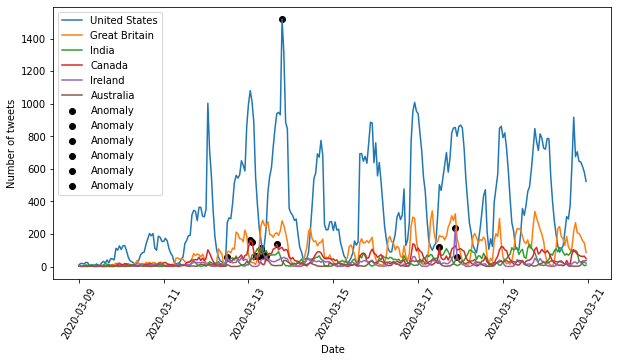

In [28]:


for x in list(dict_countries.keys()):
  detect_anmly_and_show(twitter_df_cleaner,x)

plt.show()